In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load your dataset
df = pd.read_csv('housing_data_cleaned.csv', low_memory=False)




In [17]:
df

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241,N,67.00,49200,0,4,0,...,F,938.00,1344,A,NaN,I,1895,Y,19144,RSA5
1,NaN,ROW 2 STY MASONRY,Single Family,201,NaN,70.00,0,0,4,0,...,F,1044.00,1190,NaN,NaN,I,1940,Y,19140,RM1
2,H,ROW B/GAR 2 STY MASONRY,Single Family,281,N,95.50,0,0,4,0,...,F,1686.53,1633,B,NaN,I,1940,Y,19141,RSA3
3,NaN,ROW 2 STY MASONRY,Single Family,293,NaN,112.50,0,0,4,0,...,F,2165.62,1320,B,NaN,I,1940,Y,19124,RSA5
4,NaN,ROW 2 STY MASONRY,Single Family,62,NaN,79.00,0,0,4,0,...,F,1264.00,960,NaN,NaN,I,1920,NaN,19142,RM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68480,A,DET W/B GAR 1 STY MASONRY,Single Family,257,Y,39.66,0,0,3,0,...,F,6213.00,1360,A,NaN,I,1950,Y,19118,RSD3
68481,D,ROW 3 STY MASONRY,Single Family,378,Y,50.00,0,0,2,0,...,F,736.50,1635,A,NaN,I,1875,Y,19125,RSA5
68482,D,ROW 2 STY MASONRY,Single Family,41,N,48.00,0,0,5,0,...,F,672.00,900,A,NaN,I,1925,Y,19148,RSA5
68483,C,ROW 3 STY MASONRY,Single Family,140,N,62.00,0,0,4,0,...,F,868.00,1722,B,NaN,I,1920,Y,19130,RM1


In [18]:


df['central_air'] = df['central_air'].fillna('N')
df['basements'] = df['basements'].fillna('None')  # Example imputation

# Feature Engineering: Creating a log transformation of 'market_value'
df['log_market_value'] = np.log1p(df['market_value'])

# Selecting features for the model
features = ['total_livable_area', 'log_market_value', 'number_of_bathrooms']  # Example features
X = df[features]
y = df['sale_price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
df.columns

Index(['basements', 'building_code_description', 'category_code_description',
       'census_tract', 'central_air', 'depth', 'exempt_building',
       'exempt_land', 'exterior_condition', 'fireplaces', 'frontage', 'fuel',
       'garage_spaces', 'garage_type', 'geographic_ward', 'interior_condition',
       'location', 'market_value', 'market_value_date', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_rooms', 'number_stories',
       'quality_grade', 'sale_date', 'sale_price', 'street_designation',
       'street_direction', 'street_name', 'taxable_building', 'taxable_land',
       'topography', 'total_area', 'total_livable_area', 'type_heater', 'unit',
       'view_type', 'year_built', 'year_built_estimate', 'zip_code', 'zoning',
       'log_market_value'],
      dtype='object')

In [20]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 302854.24234842474
R^2: 0.4182304951775807


In [21]:
# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10)
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
param_distributions=param_distributions,
n_iter=10,  # Number of parameter settings sampled
cv=5,       # 5-fold cross-validation
scoring='neg_root_mean_squared_error',
random_state=42,
n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and the corresponding score
best_params = random_search.best_params_
best_score = -random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (RMSE):", best_score)



Best Parameters: {'max_depth': 30, 'min_samples_split': 8, 'n_estimators': 182}
Best Score (RMSE): 279487.5451051354


In [22]:
# Train the model with best hyperparameters
optimized_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
max_depth=best_params['max_depth'],
min_samples_split=best_params['min_samples_split'],
random_state=42)

optimized_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the optimized model
rmse_optimized = math.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized RMSE:", rmse_optimized)
print("Optimized R^2:", r2_optimized)


Optimized RMSE: 298128.09172093874
Optimized R^2: 0.4362462679053545


In [23]:
# Get feature importances
feature_importances = optimized_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(features_df)


               Feature  Importance
1     log_market_value    0.670659
0   total_livable_area    0.292884
2  number_of_bathrooms    0.036456


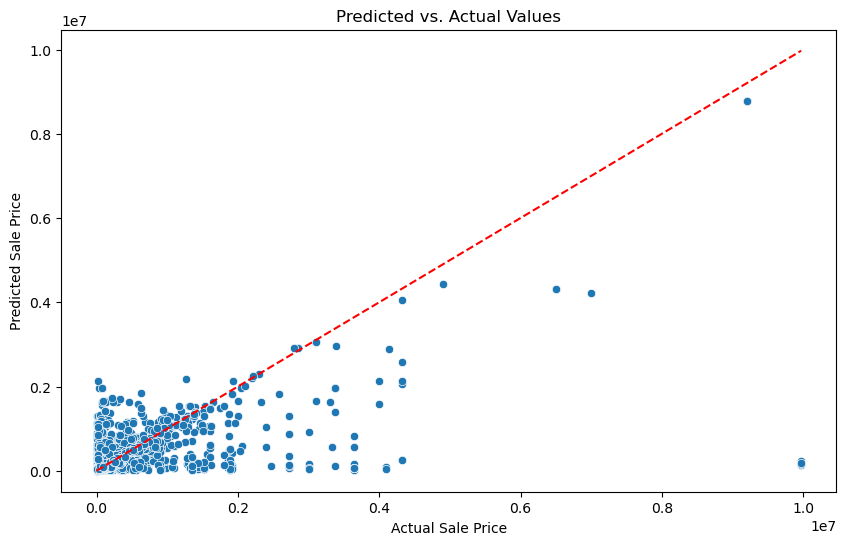

In [26]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()



In [27]:

residuals = y


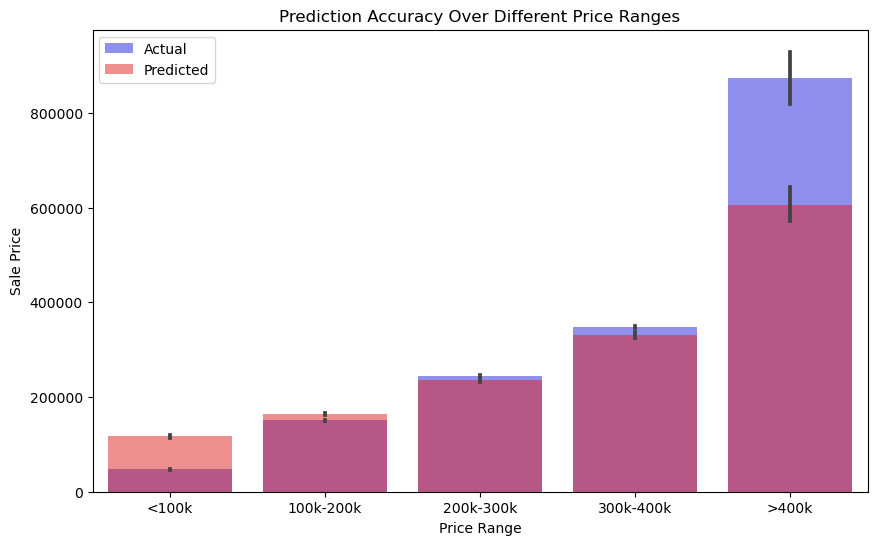

In [29]:
# Binning the data to create price range groups
bins = pd.cut(y_test, bins=[0, 100000, 200000, 300000, 400000, np.inf], labels=['<100k', '100k-200k', '200k-300k', '300k-400k', '>400k'])
accuracy_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized, 'Range': bins})

plt.figure(figsize=(10, 6))
sns.barplot(x='Range', y='Actual', data=accuracy_df, color='blue', alpha=0.5, label='Actual')
sns.barplot(x='Range', y='Predicted', data=accuracy_df, color='red', alpha=0.5, label='Predicted')
plt.title('Prediction Accuracy Over Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Sale Price')
plt.legend()
plt.show()


KeyError: "['assessment_date', 'beginning_point', 'book_and_page', 'category_code_description', 'cross_reference', 'house_number', 'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of', 'mailing_city_state', 'mailing_street', 'market_value_date', 'other_building', 'owner_1', 'owner_2', 'parcel_number', 'recording_date', 'sale_date', 'registry_number', 'unit', 'objectid', 'building_code', 'census_tract', 'date_exterior_condition', 'year_built_estimate', 'house_extension', 'mailing_zip', 'sewer', 'site_type', 'state_code', 'street_designation', 'street_name', 'street_direction', 'geographic_ward'] not found in axis"

In [23]:
# Identify numerical and categorical columns (simplified for demonstration)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Fill missing values
# For numerical columns, fill missing values with the median
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Remove outliers from numerical columns (example using Z-score, can adjust method as needed)
from scipy import stats
data = data[(np.abs(stats.zscore(data[numerical_cols])) < 3).all(axis=1)]


In [24]:
# Example feature engineering (adjust according to dataset specifics)
# Adding a new feature - 'age_of_property'
data['year_built'] = data['year_built'].astype(int)  # Ensuring 'year_built' is integer type
current_year = pd.to_datetime('today').year
data['age_of_property'] = current_year - data['year_built']

# Drop 'year_built' as it's now redundant
data.drop(['year_built'], axis=1, inplace=True)


KeyError: 'year_built'

In [19]:
# Separating features and target variable
X = data.drop(['sale_price'], axis=1)  # Assuming 'price' is the target variable
y = data['sale_price'].values

# Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['sale_price'] not found in axis"

In [20]:
# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


ValueError: A given column is not a column of the dataframe